In [1]:
import tensorflow as tf
import keras

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from tensorflow.keras import layers
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

In [2]:
DATASET_DIR = r"F:\data for final project sem3\archive\Coronahack-Chest-XRay-Dataset\Coronahack-Chest-XRay-Dataset\exp4\train"

## model 1 save

In [5]:
IMG_W = 700
IMG_H = 700
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 10
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= True,
    subset='validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE, epochs = EPOCHS)

Epoch 1/10
100/100 [==============================] - 71s 608ms/step - loss: 1.9417 - accuracy: 0.6156 - val_loss: 0.5125 - val_accuracy: 0.7925
Epoch 2/10
100/100 [==============================] - 60s 594ms/step - loss: 0.4485 - accuracy: 0.8425 - val_loss: 0.5453 - val_accuracy: 0.8000
Epoch 3/10
100/100 [==============================] - 60s 603ms/step - loss: 0.6667 - accuracy: 0.8675 - val_loss: 0.3231 - val_accuracy: 0.8875
Epoch 4/10
100/100 [==============================] - 61s 610ms/step - loss: 0.3947 - accuracy: 0.8888 - val_loss: 0.3546 - val_accuracy: 0.8625
Epoch 5/10
100/100 [==============================] - 60s 602ms/step - loss: 0.7455 - accuracy: 0.9031 - val_loss: 0.2801 - val_accuracy: 0.8975
Epoch 6/10
100/100 [==============================] - 59s 592ms/step - loss: 0.2944 - accuracy: 0.9038 - val_loss: 0.7983 - val_accuracy: 0.8150
Epoch 7/10
100/100 [==============================] - 60s 597ms/step - loss: 0.2056 - accuracy: 0.9269 - val_loss: 0.3998 - val_ac

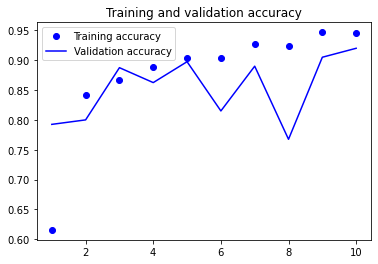

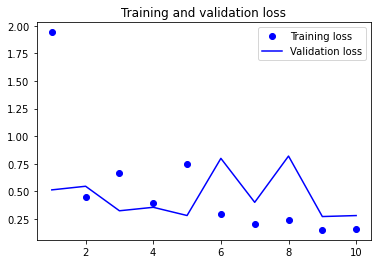

In [8]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Model 2 save

In [24]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 50
BATCH_SIZE = 8

train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= True,
    subset='validation')

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [25]:
inputs = keras.Input(shape=INPUT_SHAPE)

x = inputs
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE, epochs = EPOCHS)

Epoch 1/50
60/60 [==============================] - 11s 162ms/step - loss: 0.7526 - accuracy: 0.5667 - val_loss: 0.6147 - val_accuracy: 0.6500
Epoch 2/50
60/60 [==============================] - 10s 159ms/step - loss: 0.4653 - accuracy: 0.8188 - val_loss: 0.4699 - val_accuracy: 0.7833
Epoch 3/50
60/60 [==============================] - 10s 160ms/step - loss: 0.3322 - accuracy: 0.8646 - val_loss: 0.2543 - val_accuracy: 0.8917
Epoch 4/50
60/60 [==============================] - 10s 163ms/step - loss: 0.2634 - accuracy: 0.9146 - val_loss: 0.3163 - val_accuracy: 0.8750
Epoch 5/50
60/60 [==============================] - 10s 159ms/step - loss: 0.2830 - accuracy: 0.8896 - val_loss: 0.2727 - val_accuracy: 0.8833
Epoch 6/50
60/60 [==============================] - 10s 161ms/step - loss: 0.2380 - accuracy: 0.9042 - val_loss: 0.2877 - val_accuracy: 0.8917
Epoch 7/50
60/60 [==============================] - 10s 159ms/step - loss: 0.1948 - accuracy: 0.9312 - val_loss: 0.5880 - val_accuracy: 0.7833

In [30]:
# model.save(r'F:\data for final project sem3\results\model 2')

INFO:tensorflow:Assets written to: F:\data for final project sem3\results\model 2\assets


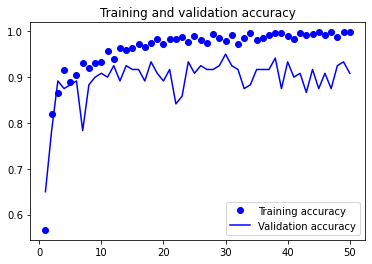

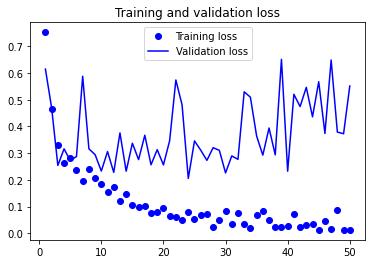

In [28]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## model 3

In [8]:
IMG_W = 150
IMG_H = 150
CHANNELS = 1

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= True,
    subset='validation')

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [9]:
inputs = keras.Input(shape=(150, 150, 3))

x = inputs
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE, epochs = EPOCHS)

Epoch 1/20
7/7 [==============================] - 14s 2s/step - loss: 1.5355 - accuracy: 0.5168 - val_loss: 1.5618 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 1.5973 - accuracy: 0.4888 - val_loss: 1.7781 - val_accuracy: 0.4062
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 1.4791 - accuracy: 0.4952 - val_loss: 1.4200 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 1.4264 - accuracy: 0.4832 - val_loss: 1.2209 - val_accuracy: 0.5469
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 1.3044 - accuracy: 0.5024 - val_loss: 1.1917 - val_accuracy: 0.5312
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 1.2589 - accuracy: 0.4904 - val_loss: 1.3995 - val_accuracy: 0.4062
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 1.1709 - accuracy: 0.4976 - val_loss: 1.2847 - val_accuracy: 0.4219
Epoch 8/20
7/7 [========================

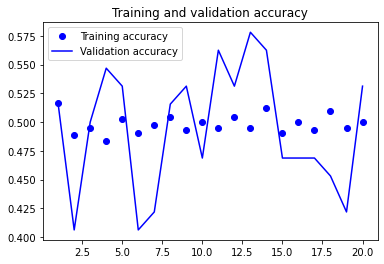

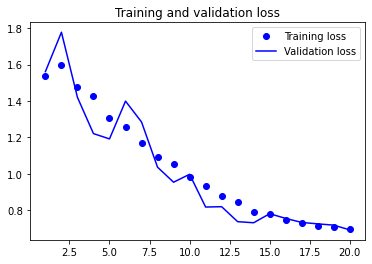

In [11]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## model 4 save

In [10]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 15
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= True,
    subset='validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [11]:
inputs = keras.Input(shape=INPUT_SHAPE)

x = inputs
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE, epochs = EPOCHS)

Epoch 1/15
100/100 [==============================] - 32s 311ms/step - loss: 0.7030 - accuracy: 0.5638 - val_loss: 0.6907 - val_accuracy: 0.5525
Epoch 2/15
100/100 [==============================] - 30s 300ms/step - loss: 0.6260 - accuracy: 0.6475 - val_loss: 0.6676 - val_accuracy: 0.6625
Epoch 3/15
100/100 [==============================] - 30s 297ms/step - loss: 0.5180 - accuracy: 0.8069 - val_loss: 0.4512 - val_accuracy: 0.8125
Epoch 4/15
100/100 [==============================] - 30s 298ms/step - loss: 0.4554 - accuracy: 0.8656 - val_loss: 0.4183 - val_accuracy: 0.9025
Epoch 5/15
100/100 [==============================] - 30s 295ms/step - loss: 0.4028 - accuracy: 0.9119 - val_loss: 0.3871 - val_accuracy: 0.9150
Epoch 6/15
100/100 [==============================] - 35s 353ms/step - loss: 0.3759 - accuracy: 0.9181 - val_loss: 0.3568 - val_accuracy: 0.9225
Epoch 7/15
100/100 [==============================] - 31s 310ms/step - loss: 0.3526 - accuracy: 0.9187 - val_loss: 0.3361 - val_ac

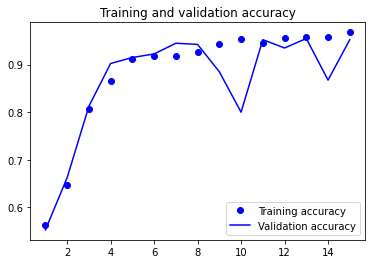

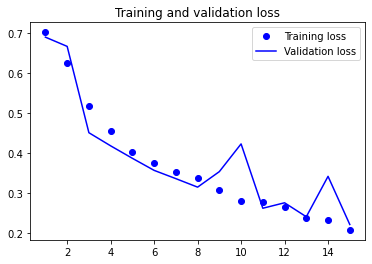

In [13]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()